<a href="https://colab.research.google.com/github/karthickmsd22/Codsoft_task-1/blob/main/CODSOFT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TITANIC DATA***

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv('/content/TITANIC.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## ***Analyzing data***

In [11]:
  def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values
    sum['count'] = df.count().values
    #sum['skew'] = df.skew().values
    desc = pd.DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


In [12]:
df.shape

(418, 12)

In [13]:
df.drop(columns=['Cabin'], inplace=True)

In [14]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


In [15]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [16]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [17]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188


In [18]:
df.drop(columns=['PassengerId', 'Name'], inplace=True)

In [19]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


In [20]:
df['Ticket'].sample(10)

211    SOTON/O.Q. 3101308
357                  1222
174                347077
265                349235
31             C.A. 31029
307                392091
73               PC 17562
234              PC 17599
100                 11778
260                345572
Name: Ticket, dtype: object

In [21]:
df.drop(columns=['Ticket'], inplace=True)

In [22]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


<Axes: xlabel='Sex', ylabel='count'>

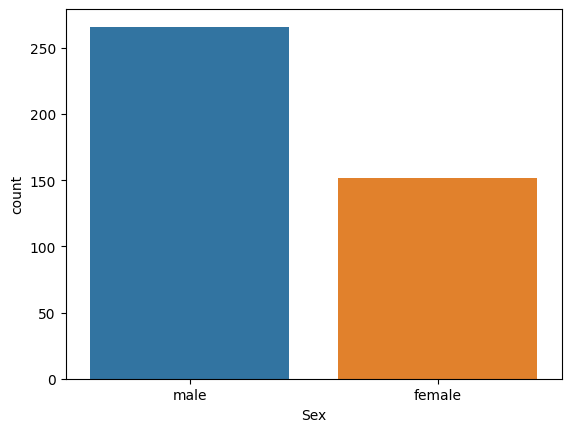

In [23]:
sns.countplot(x=df['Sex'])

<Axes: xlabel='Embarked', ylabel='count'>

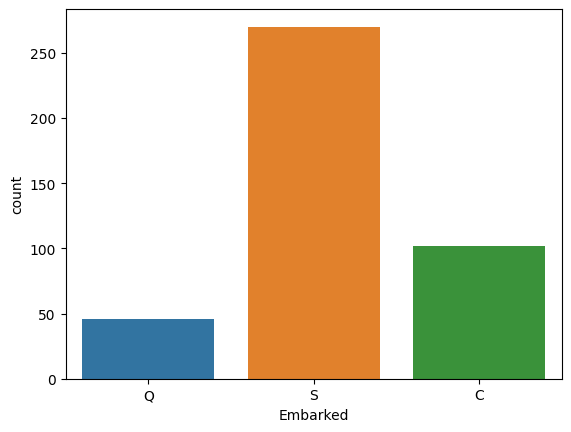

In [24]:
sns.countplot(x=df['Embarked'])

<Axes: xlabel='Survived', ylabel='count'>

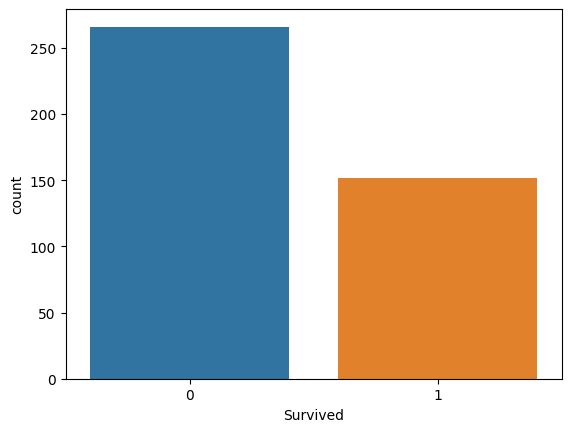

In [25]:
sns.countplot(x=df['Survived'])

In [26]:
le = LabelEncoder()
columnsle=['Sex', 'Embarked']
for i in columnsle:
    df[i] = le.fit_transform(df[i])

In [27]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Sex,int64,0,0.000000,2,418,0.000000,1.000000,0.636364
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,int64,0,0.000000,3,418,0.000000,2.000000,1.401914


# ***Balancing the data***

In [28]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [29]:
from imblearn.combine import SMOTETomek
smt=SMOTETomek()
x,y=smt.fit_resample(x,y)

<Axes: xlabel='Survived', ylabel='count'>

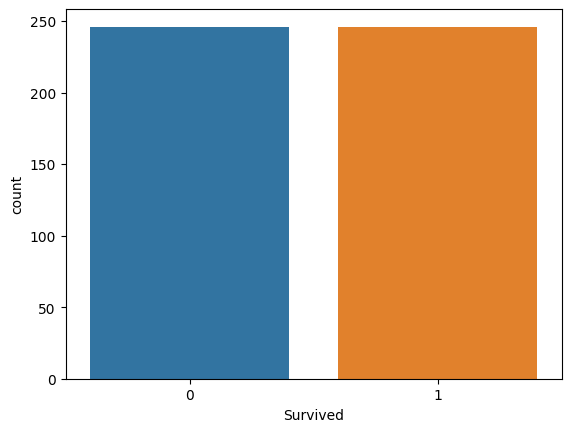

In [30]:
sns.countplot(x=y)

# ***Applying Models***

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [32]:
dtree = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
ada = AdaBoostClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()

In [33]:
dtree.fit(x_train, y_train)
rf.fit(x_train, y_train)
gb.fit(x_train, y_train)
ada.fit(x_train, y_train)
knn.fit(x_train, y_train)
lr.fit(x_train, y_train)

LogisticRegression()

In [34]:
pdtreetr = dtree.predict(x_train)
pdtreete = dtree.predict(x_test)

prftr = rf.predict(x_train)
prfte = rf.predict(x_test)

pgbtr = gb.predict(x_train)
pgbte = gb.predict(x_test)

padatr = ada.predict(x_train)
padate = ada.predict(x_test)

pknntr = knn.predict(x_train)
pknnte = knn.predict(x_test)

In [35]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

In [36]:
print(acc_report(y_train, pdtreetr))
print(acc_report(y_test, pdtreete))

the accuracy of tha model is  1.0
[[188   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       205

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393

None
the accuracy of tha model is  1.0
[[58  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        41

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

None


In [37]:
print(acc_report(y_train, prftr))
print(acc_report(y_test, prfte))

the accuracy of tha model is  1.0
[[188   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       205

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393

None
the accuracy of tha model is  1.0
[[58  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        41

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

None


In [38]:
print(acc_report(y_train, pgbtr))
print(acc_report(y_test, pgbte))

the accuracy of tha model is  1.0
[[188   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       205

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393

None
the accuracy of tha model is  1.0
[[58  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        41

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

None


In [39]:
print(acc_report(y_train, padatr))
print(acc_report(y_test, padate))

the accuracy of tha model is  1.0
[[188   0]
 [  0 205]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       205

    accuracy                           1.00       393
   macro avg       1.00      1.00      1.00       393
weighted avg       1.00      1.00      1.00       393

None
the accuracy of tha model is  1.0
[[58  0]
 [ 0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        41

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

None


In [40]:
print(acc_report(y_train, pknntr))
print(acc_report(y_test, pknnte))

the accuracy of tha model is  0.8295165394402035
[[144  44]
 [ 23 182]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       188
           1       0.81      0.89      0.84       205

    accuracy                           0.83       393
   macro avg       0.83      0.83      0.83       393
weighted avg       0.83      0.83      0.83       393

None
the accuracy of tha model is  0.7474747474747475
[[42 16]
 [ 9 32]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        58
           1       0.67      0.78      0.72        41

    accuracy                           0.75        99
   macro avg       0.75      0.75      0.74        99
weighted avg       0.76      0.75      0.75        99

None
